# Actividad 4 4.1

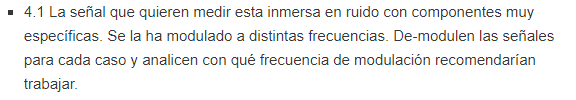

### Importamos las librerias y los archivos 4.1 de v1

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib widget


medicion_410 = np.loadtxt('data/v1/ej41_medicion_v1_Fmod=410Hz.txt', delimiter=' ', skiprows=3)
medicion_450 = np.loadtxt('data/v1/ej41_medicion_v1_Fmod=450Hz.txt', delimiter=' ', skiprows=3)
medicion_475 = np.loadtxt('data/v1/ej41_medicion_v1_Fmod=475Hz.txt', delimiter=' ', skiprows=3)
medicion_1350 = np.loadtxt('data/v1/ej41_medicion_v1_Fmod=1350Hz.txt', delimiter=' ', skiprows=3)
medicion_1375 = np.loadtxt('data/v1/ej41_medicion_v1_Fmod=1375Hz.txt', delimiter=' ', skiprows=3)

medicion = [medicion_410, medicion_450, medicion_475, medicion_1350, medicion_1375]

## Análisis de todas las mediciones

In [5]:
f_samp = 100000
muestras = len(medicion_410)
T = 1/f_samp #periodo
t = np.linspace(0, muestras-1, muestras)*T

f_ref = np.array([410, 450, 475, 1350, 1375])
omega_ref = f_ref*2*np.pi

fc = 10  # para el filtro
orden = 10  #para el filtro
sos = signal.bessel(orden, 2*np.pi*fc, 'low', fs=f_samp,output='sos') #para el filtro

referencia_x = []
referencia_y = []

PSDx = []
PSDy = []

PSDxFiltrada = []
PSDyFiltrada = []

for i in range(len(omega_ref)):
    referencia_x.append(np.array(np.sin(omega_ref[i]*t)))
    referencia_y.append(np.array(np.cos(omega_ref[i]*t)))
    
    PSDx.append(2*medicion[i]*referencia_x[i])
    PSDy.append(2*medicion[i]*referencia_y[i])
    
    PSDxFiltrada.append(signal.sosfilt(sos, PSDx[i]))
    PSDyFiltrada.append(signal.sosfilt(sos, PSDy[i]))

## Figuras

In [6]:
#%matplotlib nbagg
fig, ax  = plt.subplots(4,5,figsize=(16,9),  num=1, sharex=True)
for i in range(len(medicion)):
    ax[0][i].plot(t, referencia_x[i], label = 'referencia')
    ax[0][0].set_ylabel('Referencia [V]')

    ax[1][i].plot(t,medicion[i], label = 'señal')
    ax[1][0].set_ylabel('Señal [V]')

    ax[2][i].plot(t, PSDx[i], label = 'señal')
    ax[2][0].set_ylabel('PSD [V]')

    ax[3][i].plot(t,np.arctan2(PSDyFiltrada[i], PSDxFiltrada[i]), label = r'$\theta$')
    ax[3][i].plot(t, np.sqrt(PSDxFiltrada[i]**2+PSDyFiltrada[i]**2), label = 'R')
    ax[3][0].set_ylabel('Salida')
    ax[3][i].set_xlabel('Tiempo [s]')
#    plt.legend(loc='lower right')
    plt.show()
plt.legend(loc='lower right')
for axs in ax.flat:
    axs.label_outer()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## FFT

In [4]:
L = muestras
fig, ax = plt.subplots(4,5,figsize=  (16,9),num=2,sharex=True)
for i in range(len(medicion)):
    ax[3][4].set_xlabel('Frecuencia [Hz]')
    ax[3][4].set_xlim([1,2.5*f_ref[i]])
    ax[3][4].set_xscale('linear')


    # Armamos el vector de frecuencias.
    freqs=np.fft.fftfreq(L,1/f_samp)

    # 1 Grafica la FFT de la referencia
    fftReferencia= np.abs(np.fft.fft(referencia_x[i]));
    ax[0][i].semilogy(freqs[0:L//2],fftReferencia[0:L//2]) 
    ax[0][0].set_ylabel('Referencia'),ax[0][i].grid(True)


    # 2 Grafica la FFT de la señal
    fftSenial= np.abs(np.fft.fft(medicion[i]));
    ax[1][i].semilogy(freqs[0:L//2],fftSenial[0:L//2]) 
    ax[1][0].set_ylabel('Señal'),ax[1][i].grid(True)

    # 3 Grafica la FFT de la señal multiplicada
    fftPSDx= np.abs(np.fft.fft(PSDx[i]));
    fftPSDy= np.abs(np.fft.fft(PSDy[i]));
    ax[2][i].semilogy(freqs[0:L//2],fftPSDx[0:L//2]) 
    ax[2][0].set_ylabel('PSD'),ax[2][i].grid(True)


    # 4 Grafica la FFT de la señal demodulada
    fftPSDxFiltrada= np.abs(np.fft.fft(PSDxFiltrada[i]));
    fftPSDyFiltrada= np.abs(np.fft.fft(PSDyFiltrada[i]));
    ax[3][i].semilogy(freqs[0:L//2],fftPSDxFiltrada[0:L//2]) 
    ax[3][0].set_ylabel('Salida'),ax[3][i].grid(True)



    plt.tight_layout()  

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Analisi de una FFT para ver las componentes del ruido.

In [5]:
plt.figure()
fftSenial= np.abs(np.fft.fft(medicion[4]));
plt.semilogy(freqs[0:L//2],fftSenial[0:L//2]) 
plt.ylabel('Señal'),ax[1][i].grid(True)
plt.xlim([1,2.5*f_ref[4]])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(1.0, 3437.5)

Figura de comparación de los datos de la señan y PSD y su tranformada de Fourier para $\omega = 1350 Hz$

In [6]:
fig, ax = plt.subplots(3,2, figsize=(16,9))
fig.suptitle('Frecuencia $\omega$ = 1350 Hz', fontsize = 20)
ax[0][0].plot(t, referencia_x[3], label = 'referencia')
ax[0][0].set_ylabel('Referencia [V]', fontsize = 15)

ax[0][0].set_xlim([0.5, 0.55])

ax[1][0].plot(t,medicion[3], label = 'señal')
ax[1][0].set_ylabel('Señal [V]', fontsize = 15)
ax[1][0].set_xlim([0.5, 0.55])

ax[2][0].plot(t, PSDx[3], label = 'señal')
ax[2][0].set_ylabel('PSD [V]', fontsize = 15)
ax[2][0].set_xlabel('Tiempo [s]', fontsize = 15)
ax[2][0].set_xlim([0.5, 0.55])
freqs=np.fft.fftfreq(L,1/f_samp)

# 1 Grafica la FFT de la referencia
fftReferencia= np.abs(np.fft.fft(referencia_x[3]));
ax[0][1].semilogy(freqs[0:L//2],fftReferencia[0:L//2]) 
ax[0][1].set_xlim([1,2.5*f_ref[3]])

# 2 Grafica la FFT de la señal
fftSenial= np.abs(np.fft.fft(medicion[3]));
ax[1][1].semilogy(freqs[0:L//2],fftSenial[0:L//2]) 
ax[1][1].set_xlim([1,2.5*f_ref[3]])

# 3 Grafica la FFT de la señal multiplicada
fftPSDx= np.abs(np.fft.fft(PSDx[3]));
fftPSDy= np.abs(np.fft.fft(PSDy[3]));
ax[2][1].semilogy(freqs[0:L//2],fftPSDx[0:L//2]) 
ax[2][1].set_xlabel('Frecuencia [Hz]', fontsize = 15)
ax[2][1].set_xlim([1,2.5*f_ref[3]])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(1.0, 3375.0)

Figura de analisis de Todas las frecuencias para compararlas, estan divididas en dos figuras porque de esta forma se importaron en la presentación.

In [ ]:
# Figura con 4 de las 5 frecuencias 
fig, ax = plt.subplots(2,2,figsize = (16,9),sharex=True,sharey = True)
for i in range(len(medicion)-1):
    if i<2:
        ax[i][0].plot(t,np.sqrt(PSDxFiltrada[i]**2+PSDyFiltrada[i]**2), label = 'R[V]',color = 'tab:orange')
        ax[i][0].grid(True)
        print(i)
    else:
        ax[i-2][1].plot(t,np.sqrt(PSDxFiltrada[i]**2+PSDyFiltrada[i]**2), label = 'R[V]' ,color = 'tab:orange')
        ax[i-2][1].grid(True)
        print('hola', i)
    
ax[1][0].set_xlabel('Tiempo [s]', fontsize = 15)
ax[1][1].set_xlabel('Tiempo [s]', fontsize = 15)

ax[0][0].set_ylabel('Salida [V]', fontsize = 15)
ax[1][0].set_ylabel('Salida [V]', fontsize = 15)

ax[0][0].set_title('$\omega$ = 410Hz', fontsize = 18)
ax[1][0].set_title('$\omega$ = 450Hz', fontsize = 18)
ax[0][1].set_title('$\omega$ = 475Hz', fontsize = 18)
ax[1][1].set_title('$\omega$ = 1350Hz', fontsize = 18)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

# Figura restante

plt.figure(figsize=(12,7))
plt.plot(t,np.sqrt(PSDxFiltrada[4]**2+PSDyFiltrada[4]**2), label = 'R[V]',color = 'tab:orange')
plt.title('$\omega$ = 1375Hz', fontsize = 18)
plt.xlabel('Tiempo [s]',  fontsize = 15)
plt.ylabel('Salida [V]',  fontsize = 15)
plt.yticks([0,1,2,3,4,5])
plt.grid(True)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 